# manueverMotifs - plots generator for the paper

### Maria Inês Silva
### 05/10/2019

***

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from extendedMD.emd import find_motifs_from_emd
from extendedMD.viz import create_motif_table
from extendedMD.pruning import prune_motifs_with_mdl

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import uah_utils
import motif_utils
import lon_viz
import lat_viz

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, os.pardir, 'data-uah/D6'))
output_folder = os.path.abspath(os.path.join(cwd, os.pardir, 'data-motifs'))

freq_per_second=10
R=0.1
driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)

***

## 1. Identifying brakes and accelerations in the longitudinal acceleration

#### No maneuver, brake and brake-acceleration for the aggressive trip:

In [5]:
trip_df = driver_df[driver_df['trip_id'] == "20151221120051"].reset_index(drop=True)
ts = trip_df['az'].values

file_name = "motif_lon_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".p"
motif_dic_list = pickle.load(open(os.path.join(output_folder, file_name), 'rb'))

pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)

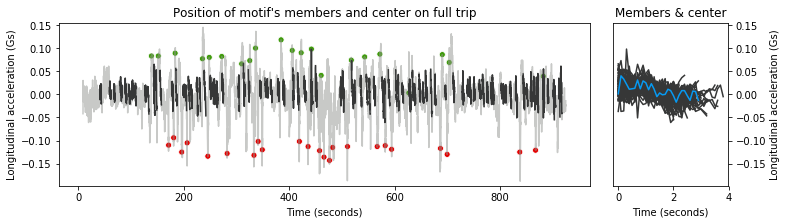

In [6]:
motif_dic = pruned_motif_dic_list[0]
lon_viz.plot_single_motif(trip_df, motif_dic, add_suptitle=False)
plt.savefig('lon_agg_nomanu.png', bbox_inches='tight')

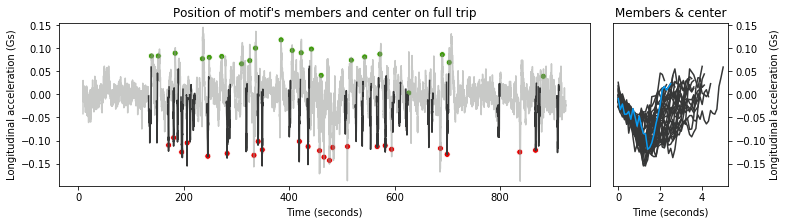

In [7]:
motif_dic = pruned_motif_dic_list[1]
lon_viz.plot_single_motif(trip_df, motif_dic, add_suptitle=False)
plt.savefig('lon_agg_brak.png', bbox_inches='tight')

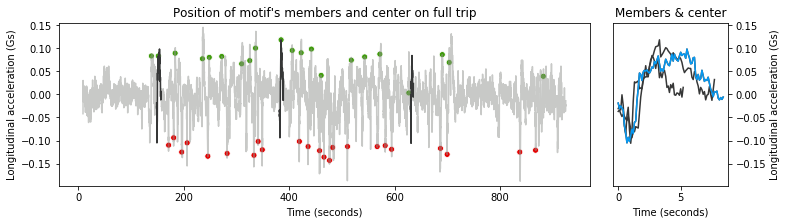

In [8]:
motif_dic = pruned_motif_dic_list[4]
lon_viz.plot_single_motif(trip_df, motif_dic, add_suptitle=False)
plt.savefig('lon_agg_ba.png', bbox_inches='tight')

#### Zoom-in on a two brakes in the dorwsy trip:

In [9]:
trip_df = driver_df[driver_df['trip_id'] == "20151217164730"].reset_index(drop=True)
ts = trip_df['az'].values

file_name = "motif_lon_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".p"
motif_dic_list = pickle.load(open(os.path.join(output_folder, file_name), 'rb'))

pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)

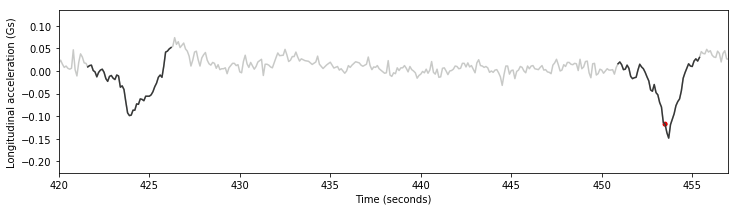

In [10]:
motif_dic = pruned_motif_dic_list[1]
lon_viz.plot_zoomin_motif(trip_df, motif_dic, [420, 457])
plt.savefig('lon_dro_zoom.png', bbox_inches='tight')

***

## 2. Identifying turns in the lateral acceleration

#### No maneuver and lane change for the aggressive trip:

In [11]:
trip_df = driver_df[driver_df['trip_id'] == "20151221120051"].reset_index(drop=True)
ts = trip_df['ay'].values

file_name = "motif_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".p"
motif_dic_list = pickle.load(open(os.path.join(output_folder, file_name), 'rb'))

pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)

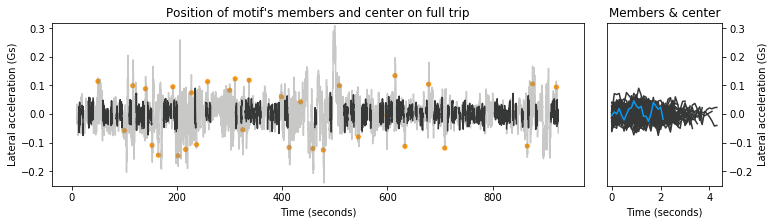

In [12]:
motif_dic = pruned_motif_dic_list[0]
lat_viz.plot_single_motif(trip_df, motif_dic, add_suptitle=False)
plt.savefig('lat_agg_nomanu.png', bbox_inches='tight')

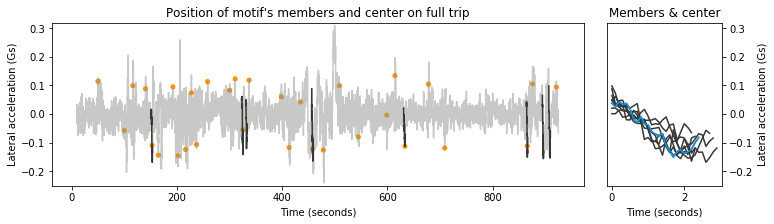

In [13]:
motif_dic = pruned_motif_dic_list[3]
lat_viz.plot_single_motif(trip_df, motif_dic, add_suptitle=False)
plt.savefig('lat_agg_lc.png', bbox_inches='tight')

#### Drift for the drowsy trip:

In [14]:
trip_df = driver_df[driver_df['trip_id'] == "20151217164730"].reset_index(drop=True)
ts = trip_df['ay'].values

file_name = "motif_lat_" + trip_df["trip_label"][0] + "_" + trip_df["road"][0] + ".p"
motif_dic_list = pickle.load(open(os.path.join(output_folder, file_name), 'rb'))

pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)

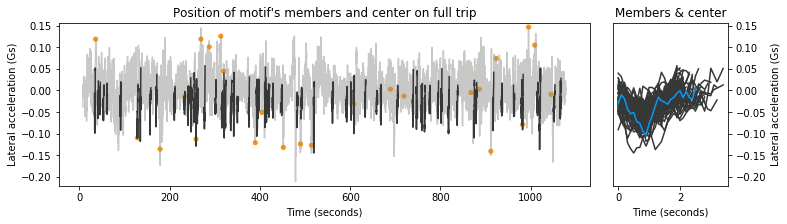

In [15]:
motif_dic = pruned_motif_dic_list[1]
lat_viz.plot_single_motif(trip_df, motif_dic, add_suptitle=False)
plt.savefig('lat_dro_drift.png', bbox_inches='tight')